In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pdbs_to_remove = {'7l7e_C0-D0'}#{'6xsw', '7cj2', '7e9b', '7m3n', '7n3c', '7n3d', '7o52', '7or9', '7kpj', '7kn4'}
sns.set_theme(context='paper',font_scale=1.2,style='whitegrid')
figsize = (5,5)
plot_folder = Path('../figures/confidence_cutoff_plots')
plot_folder.mkdir(exist_ok=True)
af2_plddt_antibody_df = pd.read_csv('../data/AF2_antibody_rmsd_plddt_multi_regions.csv')
af2_plddt_antibody_df = af2_plddt_antibody_df.loc[[pdb not in pdbs_to_remove for pdb in af2_plddt_antibody_df['pdb']]]
af2_plddt_antigen_df = pd.read_csv('../data/AF2_antigen_rmsd_plddt_multi_regions.csv')
af2_plddt_antigen_df = af2_plddt_antigen_df.loc[[pdb not in pdbs_to_remove for pdb in af2_plddt_antigen_df['pdb']]]
abb2_conf_df = pd.read_csv('../data/ABB2_antibody_rmsd_conf.csv')
abb2_conf_df = abb2_conf_df.loc[[pdb not in pdbs_to_remove for pdb in abb2_conf_df['pdb']]]

frac_remaining=0.9


frac_remaining=0.9
frac_remain_rmsd_para=1.7014595254715303, frac_remove_rmsd_para=3.134885115159769, full set mean 1.8587867243397518
frac_remain_rmsd_epi=0.8653325102838784, frac_remove_rmsd_epi=2.579492793375006, full set mean 1.053472053549978


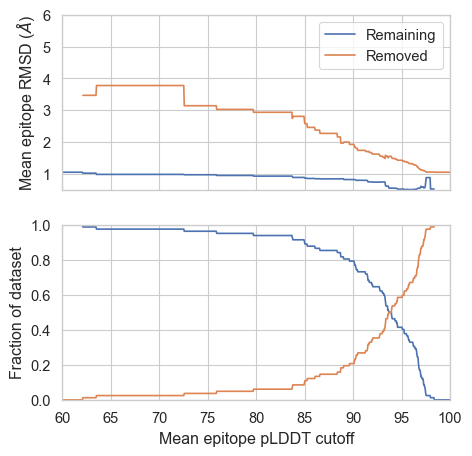

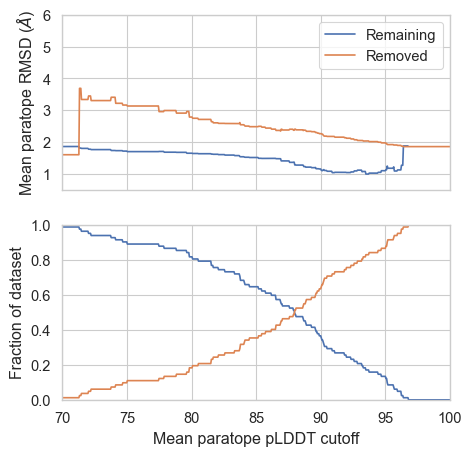

In [2]:
plddt_cutoffs = np.linspace(50,100,num=1000)
rmsd_mean_epitope_cutoff_remain = [af2_plddt_antigen_df.query('plddt_ave_para_epi > @cutoff')['rmsd_para_epi'].mean() for cutoff in plddt_cutoffs]
rmsd_mean_epitope_cutoff_remove = [af2_plddt_antigen_df.query('plddt_ave_para_epi <= @cutoff')['rmsd_para_epi'].mean() for cutoff in plddt_cutoffs]

rmsd_mean_paratope_cutoff_remain = [af2_plddt_antibody_df.query('plddt_ave_para_epi > @cutoff')['rmsd_para_epi'].mean() for cutoff in plddt_cutoffs]
rmsd_mean_paratope_cutoff_remove = [af2_plddt_antibody_df.query('plddt_ave_para_epi <= @cutoff')['rmsd_para_epi'].mean() for cutoff in plddt_cutoffs]

count_epitope = np.array([len(af2_plddt_antigen_df.query('plddt_ave_para_epi > @cutoff')) for cutoff in plddt_cutoffs])
count_paratope = np.array([len(af2_plddt_antibody_df.query('plddt_ave_para_epi > @cutoff')) for cutoff in plddt_cutoffs])
frac_epitope = count_epitope / len(af2_plddt_antigen_df)
frac_paratope = count_paratope / len(af2_plddt_antibody_df)

frac_remain_rmsd_para = rmsd_mean_paratope_cutoff_remain[np.where(frac_paratope<=frac_remaining)[0][0]]
frac_remain_rmsd_epi = rmsd_mean_epitope_cutoff_remain[np.where(frac_epitope<=frac_remaining)[0][0]]

frac_remove_rmsd_para = rmsd_mean_paratope_cutoff_remove[np.where(frac_paratope<=frac_remaining)[0][0]]
frac_remove_rmsd_epi = rmsd_mean_epitope_cutoff_remove[np.where(frac_epitope<=frac_remaining)[0][0]]

print(f"{frac_remaining=}")
print(f"{frac_remain_rmsd_para=}, {frac_remove_rmsd_para=}, full set mean {af2_plddt_antibody_df['rmsd_para_epi'].mean()}")
print(f"{frac_remain_rmsd_epi=}, {frac_remove_rmsd_epi=}, full set mean {af2_plddt_antigen_df['rmsd_para_epi'].mean()}")


fig, ax = plt.subplots(2,figsize=(5,5),sharex=True)
ax[0].plot(plddt_cutoffs,rmsd_mean_epitope_cutoff_remain, label='Remaining')
ax[0].plot(plddt_cutoffs,rmsd_mean_epitope_cutoff_remove, label='Removed')
ax[1].plot(plddt_cutoffs,frac_epitope, label='Remaining')
ax[1].plot(plddt_cutoffs,1-frac_epitope, label='Removed')
ax[0].legend(loc='best')
ax[0].set_xlim(left=60,right=100)
ax[1].set_xlabel('Mean epitope pLDDT cutoff')
ax[1].set_ylabel('Fraction of dataset')
ax[0].set_yticks([1,2,3,4,5,6])
ax[0].set_ylim(0.5,6)
ax[1].set_ylim([0,1])
ax[0].set_ylabel(r'Mean epitope RMSD ($\AA$)')
fig.savefig(plot_folder/'plddt_epitope_cutoff_vs_rmsd.png',dpi=200)

fig, ax = plt.subplots(2,figsize=(5,5),sharex=True)
ax[0].plot(plddt_cutoffs,rmsd_mean_paratope_cutoff_remain,label='Remaining')
ax[0].plot(plddt_cutoffs,rmsd_mean_paratope_cutoff_remove,label='Removed')
ax[1].plot(plddt_cutoffs,frac_paratope,label='Remaining')
ax[1].plot(plddt_cutoffs,1-frac_paratope,label='Removed')

ax[0].legend(loc='best')
ax[0].set_xlim(left=70,right=100)
ax[1].set_xlabel('Mean paratope pLDDT cutoff')
ax[1].set_ylabel('Fraction of dataset')
ax[0].set_ylim(0.5,6)
ax[0].set_yticks([1,2,3,4,5,6])
ax[1].set_ylim([0,1])
ax[0].set_ylabel(r'Mean paratope RMSD ($\AA$)')
fig.savefig(plot_folder/'plddt_paratope_cutoff_vs_rmsd.png',dpi=200)

frac_remaining=0.9
frac_remain_rmsd_para=1.759638815691713, frac_remove_rmsd_para=3.68346673228989, full set mean 1.9473293441403157


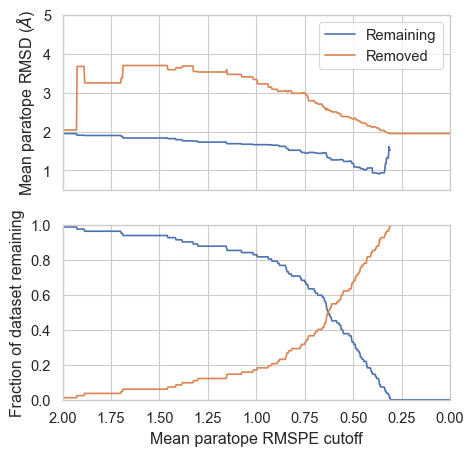

In [3]:
RMSPE_cutoffs = np.linspace(0,3,num=1000)
rmsd_mean_paratope_cutoff_remain = [abb2_conf_df.query('para_ave_conf < @cutoff')['rmsd_paratope'].mean() for cutoff in RMSPE_cutoffs]
rmsd_mean_paratope_cutoff_remove = [abb2_conf_df.query('para_ave_conf >= @cutoff')['rmsd_paratope'].mean() for cutoff in RMSPE_cutoffs]

count_paratope = np.array([len(abb2_conf_df.query('para_ave_conf < @cutoff')) for cutoff in RMSPE_cutoffs])
frac_paratope = count_paratope / len(abb2_conf_df)

frac_remain_rmsd_para = rmsd_mean_paratope_cutoff_remain[np.where(frac_paratope>=frac_remaining)[0][0]]
frac_remove_rmsd_para = rmsd_mean_paratope_cutoff_remove[np.where(frac_paratope>=frac_remaining)[0][0]]

print(f"{frac_remaining=}")
print(f"{frac_remain_rmsd_para=}, {frac_remove_rmsd_para=}, full set mean {abb2_conf_df['rmsd_paratope'].mean()}")


fig, ax = plt.subplots(2,figsize=(5,5),sharex=True)
ax[0].plot(RMSPE_cutoffs,rmsd_mean_paratope_cutoff_remain, label="Remaining")
ax[0].plot(RMSPE_cutoffs,rmsd_mean_paratope_cutoff_remove, label="Removed")

ax[1].plot(RMSPE_cutoffs,frac_paratope,label="Remaining")
ax[1].plot(RMSPE_cutoffs,1-frac_paratope,label="Removed")


frac_paratope = count_paratope / len(abb2_conf_df)

ax[0].legend(loc='best')
ax[1].set_xlabel('Mean paratope RMSPE cutoff')
ax[0].set_ylabel(r'Mean paratope RMSD ($\AA$)')
ax[1].set_ylabel('Fraction of dataset remaining')
ax[1].set_ylim([0,1])
ax[0].set_ylim([0.5,5])
ax[0].set_yticks([1,2,3,4,5])
ax[0].set_xlim([2.0,0])

fig.savefig(plot_folder/'RMSPE_cutoff_vs_rmsd.png',dpi=200)

In [4]:
topn_dockq_df = pd.read_csv('../data/topn_dockq.csv')
antigen = 'alphafold2'
protocols = ['CDR-VagueEpi-AA', 'Para-Epi']
stages_to_eval = ['Rigid-body', 'Refinement', 'Clustering']

protocol='CDR-VagueEpi-AA', stage='Rigid-body' frac_remaining=0.9
frac_remain_dockq10_para=0.27952702702702703, frac_remove_dockq10_para=0.11, full set mean 0.26298780487804874
protocol='CDR-VagueEpi-AA', stage='Refinement' frac_remaining=0.9
frac_remain_dockq10_para=0.3383648648648649, frac_remove_dockq10_para=0.11912500000000001, full set mean 0.31697560975609756
protocol='CDR-VagueEpi-AA', stage='Clustering' frac_remaining=0.9
frac_remain_dockq10_para=0.31108108108108107, frac_remove_dockq10_para=0.10062499999999999, full set mean 0.29054878048780486
protocol='Para-Epi', stage='Rigid-body' frac_remaining=0.9
frac_remain_dockq10_para=0.3852162162162162, frac_remove_dockq10_para=0.223875, full set mean 0.36947560975609756
protocol='Para-Epi', stage='Refinement' frac_remaining=0.9
frac_remain_dockq10_para=0.4862027027027027, frac_remove_dockq10_para=0.27037500000000003, full set mean 0.46514634146341466
protocol='Para-Epi', stage='Clustering' frac_remaining=0.9
frac_remain_dockq10_para

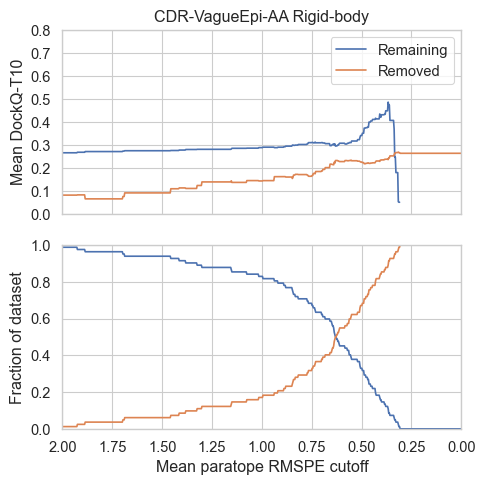

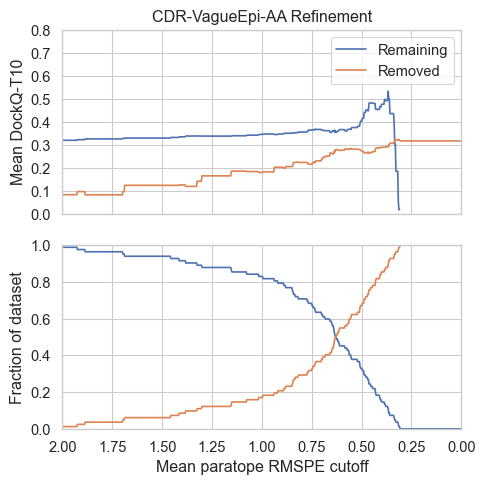

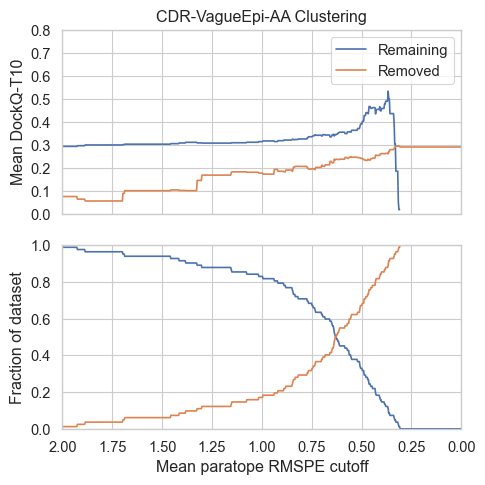

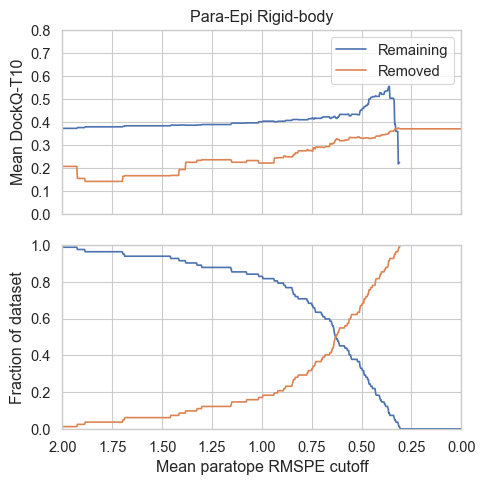

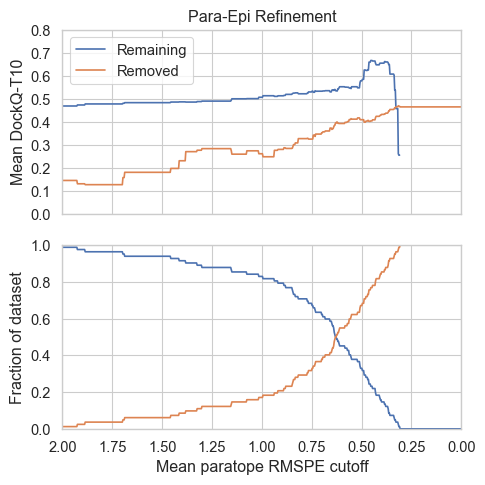

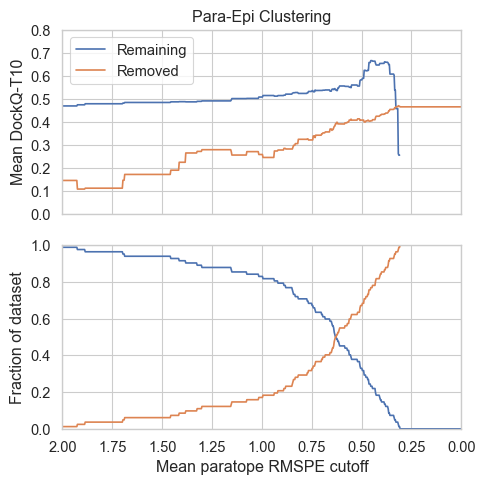

In [5]:
model_name = 'ABodyBuilder2'
local_results_path = Path('../data/results')
RMSPE_cutoffs = np.linspace(0,3,num=1000)
for protocol in protocols:
    for stage in stages_to_eval:
        model_df = abb2_conf_df.copy()
        top1_subset = topn_dockq_df.query('model_name==@model_name and protocol == @protocol and stage == @stage and '
                                          'antigen == @antigen and topn == 1')
        top10_subset = topn_dockq_df.query('model_name==@model_name and protocol == @protocol and stage == @stage and '
                                          'antigen == @antigen and topn == 10')

        model_df = model_df.merge(top1_subset[['pdb','topn_dockq']], on='pdb',how='left').rename(columns={'topn_dockq':'dockq_1'})

        model_df= model_df.merge(top10_subset[['pdb','topn_dockq']], on='pdb',how='left').rename(columns={'topn_dockq':'dockq_10'})

        DockQ_paratope_cutoff_remain = [model_df.query('para_ave_conf < @cutoff')['dockq_10'].mean() for cutoff in
                                     RMSPE_cutoffs]
        DockQ_paratope_cutoff_remove = [model_df.query('para_ave_conf >= @cutoff')['dockq_10'].mean() for cutoff in
                             RMSPE_cutoffs]

        count_paratope = np.array([len(model_df.query('para_ave_conf < @cutoff')) for cutoff in RMSPE_cutoffs])
        frac_paratope = count_paratope / len(model_df)
        frac_remain_dockq10_para = DockQ_paratope_cutoff_remain[np.where(frac_paratope>=frac_remaining)[0][0]]
        frac_remove_dockq10_para = DockQ_paratope_cutoff_remove[np.where(frac_paratope>=frac_remaining)[0][0]]

        print(f"{protocol=}, {stage=} {frac_remaining=}")
        print(f"{frac_remain_dockq10_para=}, {frac_remove_dockq10_para=}, full set mean {model_df['dockq_10'].mean()}")

        fig, ax = plt.subplots(2, figsize=(5, 5), sharex=True)
        ax[0].plot(RMSPE_cutoffs, DockQ_paratope_cutoff_remain, label='Remaining')
        ax[1].plot(RMSPE_cutoffs, frac_paratope, label='Remaining')
        ax[0].plot(RMSPE_cutoffs, DockQ_paratope_cutoff_remove, label='Removed')
        ax[1].plot(RMSPE_cutoffs, 1-frac_paratope, label='Removed')

        frac_paratope = count_paratope / len(af2_plddt_antibody_df)

        ax[1].set_xlabel('Mean paratope RMSPE cutoff')
        ax[0].set_ylabel(r'Mean DockQ-T10')
        ax[1].set_ylabel('Fraction of dataset')
        ax[1].set_ylim([0, 1])
        ax[0].set_xlim([2.0, 0])
        ax[0].set_ylim(0.,0.8)
        ax[0].set_yticks([i*0.1 for i in range(9)])
        ax[0].set_title(f'{protocol} {stage}')
        ax[0].legend(loc='best')
        fig.tight_layout()
        fig.savefig(plot_folder / f'RMSPE_cutoff_vs_DockQ-T10_{protocol}_{stage}.png', dpi=200)


protocol='CDR-VagueEpi-AA', stage='Rigid-body' frac_remaining=0.9
frac_remain_dockq10_para=0.27721621621621617, frac_remove_dockq10_para=0.131375, full set mean 0.26298780487804874
protocol='CDR-VagueEpi-AA', stage='Refinement' frac_remaining=0.9
frac_remain_dockq10_para=0.3324594594594595, frac_remove_dockq10_para=0.17375000000000002, full set mean 0.31697560975609756
protocol='CDR-VagueEpi-AA', stage='Clustering' frac_remaining=0.9
frac_remain_dockq10_para=0.3020405405405406, frac_remove_dockq10_para=0.18424999999999997, full set mean 0.29054878048780486
protocol='Para-Epi', stage='Rigid-body' frac_remaining=0.9
frac_remain_dockq10_para=0.38472972972972974, frac_remove_dockq10_para=0.228375, full set mean 0.36947560975609756
protocol='Para-Epi', stage='Refinement' frac_remaining=0.9
frac_remain_dockq10_para=0.4867567567567568, frac_remove_dockq10_para=0.26525, full set mean 0.46514634146341466
protocol='Para-Epi', stage='Clustering' frac_remaining=0.9
frac_remain_dockq10_para=0.48763

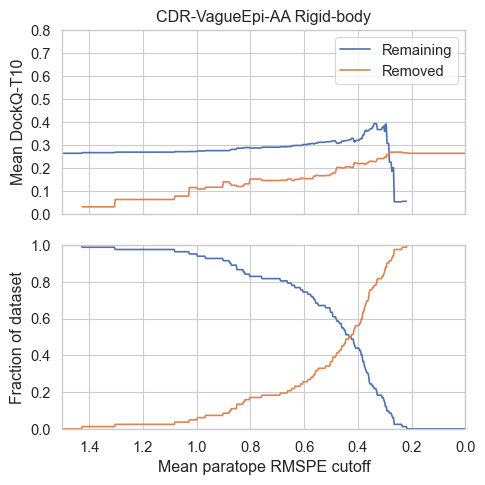

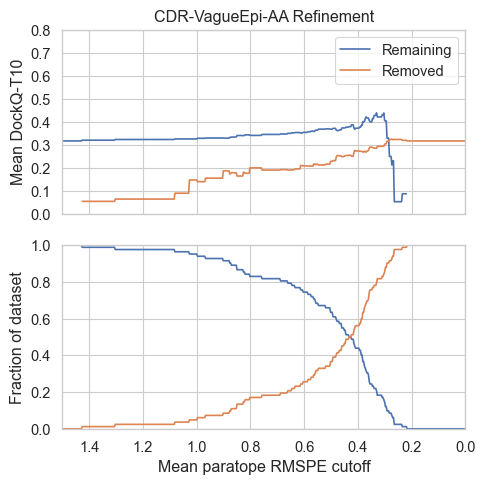

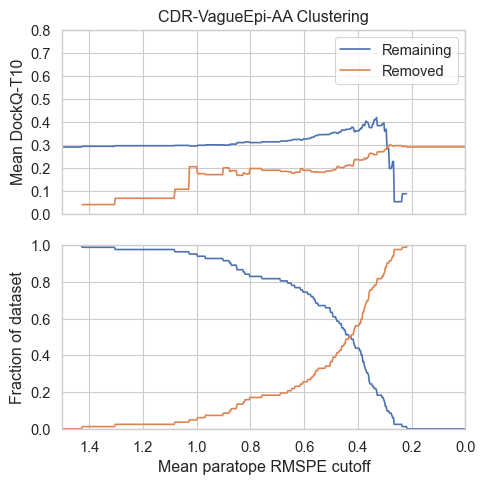

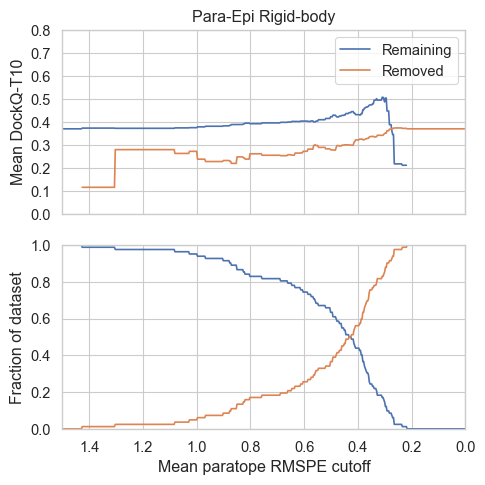

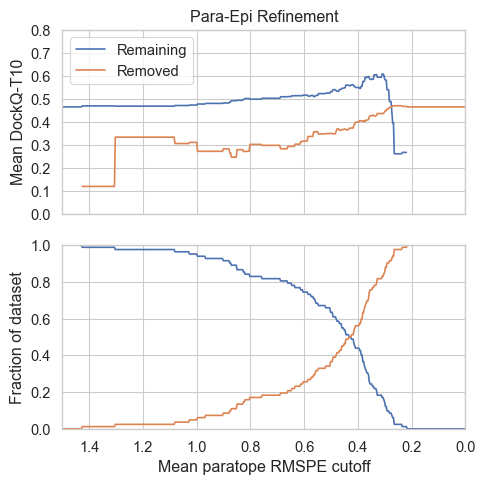

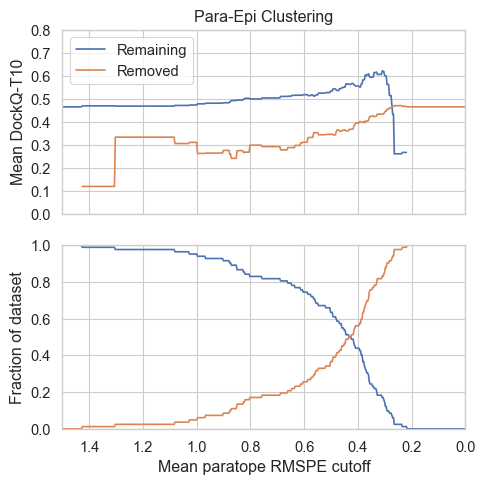

In [6]:
RMSPE_cutoffs = np.linspace(0,3,num=1000)
for protocol in protocols:
    for stage in stages_to_eval:
        model_df = abb2_conf_df.copy()
        top1_subset = topn_dockq_df.query('model_name==@model_name and protocol == @protocol and stage == @stage and '
                                          'antigen == @antigen and topn == 1')
        top10_subset = topn_dockq_df.query('model_name==@model_name and protocol == @protocol and stage == @stage and '
                                          'antigen == @antigen and topn == 10')

        model_df = model_df.merge(top1_subset[['pdb','topn_dockq']], on='pdb',how='left').rename(columns={'topn_dockq':'dockq_1'})

        model_df= model_df.merge(top10_subset[['pdb','topn_dockq']], on='pdb',how='left').rename(columns={'topn_dockq':'dockq_10'})
        DockQ_paratope_cutoff_remain = [model_df.query('para_vague_ave_conf < @cutoff')['dockq_10'].mean() for cutoff in
                                     RMSPE_cutoffs]
        DockQ_paratope_cutoff_remove = [model_df.query('para_vague_ave_conf >= @cutoff')['dockq_10'].mean() for cutoff in
                             RMSPE_cutoffs]

        count_paratope = np.array([len(model_df.query('para_vague_ave_conf < @cutoff')) for cutoff in RMSPE_cutoffs])
        frac_paratope = count_paratope / len(model_df)
        frac_remain_dockq10_para = DockQ_paratope_cutoff_remain[np.where(frac_paratope>=frac_remaining)[0][0]]
        frac_remove_dockq10_para = DockQ_paratope_cutoff_remove[np.where(frac_paratope>=frac_remaining)[0][0]]

        print(f"{protocol=}, {stage=} {frac_remaining=}")
        print(f"{frac_remain_dockq10_para=}, {frac_remove_dockq10_para=}, full set mean {model_df['dockq_10'].mean()}")

        fig, ax = plt.subplots(2, figsize=(5, 5), sharex=True)
        ax[0].plot(RMSPE_cutoffs, DockQ_paratope_cutoff_remain, label='Remaining')
        ax[1].plot(RMSPE_cutoffs, frac_paratope, label='Remaining')
        ax[0].plot(RMSPE_cutoffs, DockQ_paratope_cutoff_remove, label='Removed')
        ax[1].plot(RMSPE_cutoffs, 1-frac_paratope, label='Removed')

        frac_paratope = count_paratope / len(af2_plddt_antibody_df)

        ax[1].set_xlabel('Mean paratope RMSPE cutoff')
        ax[0].set_ylabel(r'Mean DockQ-T10')
        ax[1].set_ylabel('Fraction of dataset')
        ax[1].set_ylim([0, 1])
        ax[0].set_xlim([1.5, 0])
        ax[0].set_ylim(0.,0.8)
        ax[0].set_yticks([i*0.1 for i in range(9)])
        ax[0].set_title(f'{protocol} {stage}')
        ax[0].legend(loc='best')
        fig.tight_layout()
        fig.savefig(plot_folder / f'RMSPE_vague_cutoff_vs_DockQ-T10_{protocol}_{stage}.png', dpi=200)


protocol='CDR-VagueEpi-AA', stage='Rigid-body', frac_remaining=0.9
frac_remain_dockq10_para=0.3025068493150685, frac_remove_dockq10_para=0.15811111111111112, full set mean 0.28665853658536583
protocol='CDR-VagueEpi-AA', stage='Refinement', frac_remaining=0.9
frac_remain_dockq10_para=0.33128767123287667, frac_remove_dockq10_para=0.19577777777777777, full set mean 0.31641463414634147
protocol='CDR-VagueEpi-AA', stage='Clustering', frac_remaining=0.9
frac_remain_dockq10_para=0.2921506849315068, frac_remove_dockq10_para=0.14144444444444446, full set mean 0.27560975609756094
protocol='Para-Epi', stage='Rigid-body', frac_remaining=0.9
frac_remain_dockq10_para=0.38250684931506845, frac_remove_dockq10_para=0.24800000000000003, full set mean 0.3677439024390244
protocol='Para-Epi', stage='Refinement', frac_remaining=0.9
frac_remain_dockq10_para=0.48700000000000004, frac_remove_dockq10_para=0.34255555555555556, full set mean 0.47114634146341466
protocol='Para-Epi', stage='Clustering', frac_remain

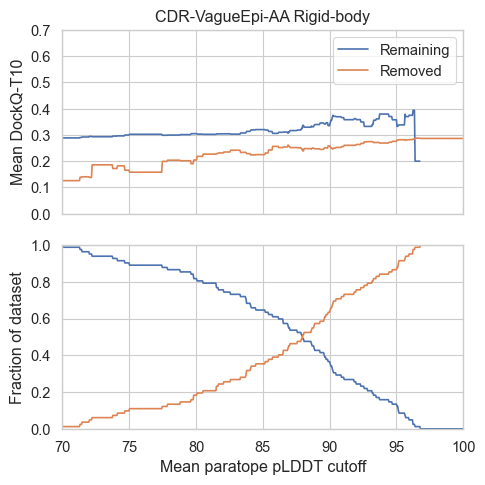

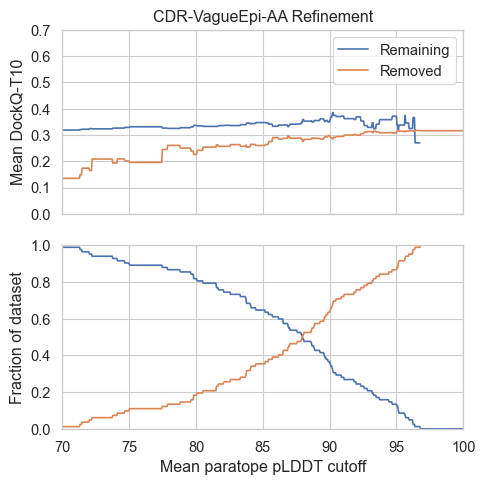

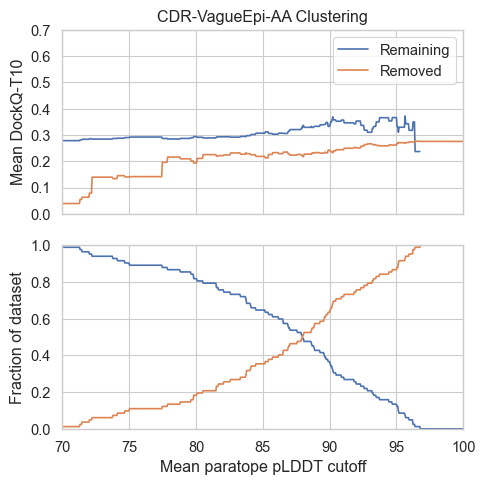

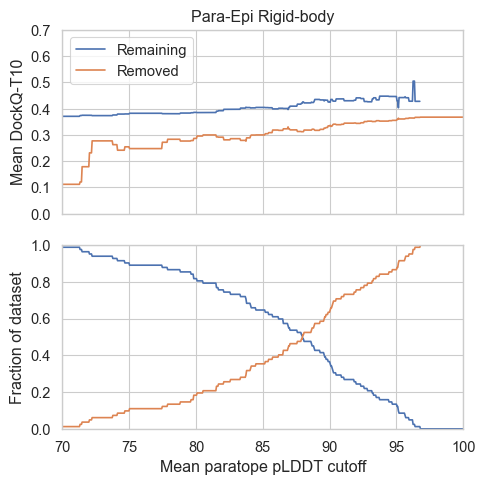

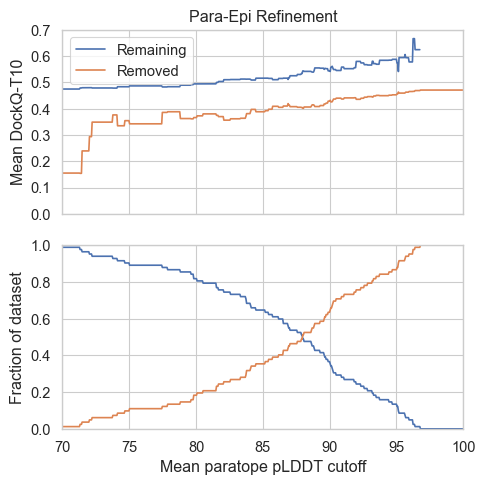

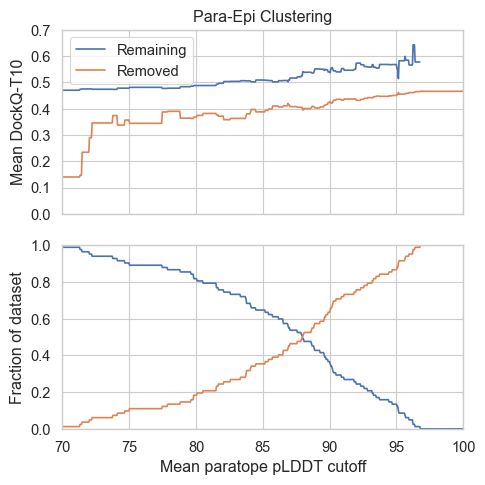

In [7]:
model_name = 'AlphaFold2'
plddt_cutoffs = np.linspace(50,100,num=1000)
for protocol in protocols:
    for stage in stages_to_eval:
        antibody_model_df = af2_plddt_antibody_df.copy()
        top1_subset = topn_dockq_df.query('model_name==@model_name and protocol == @protocol and stage == @stage and '
                                          'antigen == @antigen and topn == 1')
        top10_subset = topn_dockq_df.query('model_name==@model_name and protocol == @protocol and stage == @stage and '
                                          'antigen == @antigen and topn == 10')

        antibody_model_df = antibody_model_df.merge(top1_subset[['pdb','topn_dockq']], on='pdb',how='left').rename(columns={'topn_dockq':'dockq_1'})

        antibody_model_df= antibody_model_df.merge(top10_subset[['pdb','topn_dockq']], on='pdb',how='left').rename(columns={'topn_dockq':'dockq_10'})
        DockQ_paratope_cutoff_remain = [antibody_model_df.query('plddt_ave_para_epi > @cutoff')['dockq_10'].mean() for cutoff in
                                     plddt_cutoffs]
        DockQ_paratope_cutoff_remove = [antibody_model_df.query('plddt_ave_para_epi <= @cutoff')['dockq_10'].mean() for cutoff in
                                     plddt_cutoffs]

        count_paratope = np.array([len(antibody_model_df.query('plddt_ave_para_epi > @cutoff')) for cutoff in plddt_cutoffs])
        frac_paratope = count_paratope / len(antibody_model_df)

        frac_remain_dockq10_para = DockQ_paratope_cutoff_remain[np.where(frac_paratope<=frac_remaining)[0][0]]

        frac_remove_dockq10_para = DockQ_paratope_cutoff_remove[np.where(frac_paratope<=frac_remaining)[0][0]]

        print(f"{protocol=}, {stage=}, {frac_remaining=}")
        print(f"{frac_remain_dockq10_para=}, {frac_remove_dockq10_para=}, full set mean {antibody_model_df['dockq_10'].mean()}")

        fig, ax = plt.subplots(2,figsize=(5,5),sharex=True)
        ax[0].plot(plddt_cutoffs,DockQ_paratope_cutoff_remain,label="Remaining")
        ax[0].plot(plddt_cutoffs,DockQ_paratope_cutoff_remove,label="Removed")
        ax[1].plot(plddt_cutoffs,frac_paratope, label="Remaining")
        ax[1].plot(plddt_cutoffs,1-frac_paratope, label="Removed")
        ax[0].legend(loc='best')
        ax[1].set_xlabel('Mean paratope pLDDT cutoff')
        ax[0].set_ylabel(r'Mean DockQ-T10')
        ax[1].set_ylabel('Fraction of dataset')
        ax[1].set_ylim([0, 1])
        ax[0].set_xlim([70, 100])
        ax[0].set_ylim(0.,0.7)
        ax[0].set_yticks([i*0.1 for i in range(8)])

        ax[0].set_title(f'{protocol} {stage}')
        fig.tight_layout()
        fig.savefig(plot_folder / f'plddt_paratope_cutoff_vs_DockQ-T10_{protocol}_{stage}.png', dpi=200)

In [8]:
model_names = ['ABodyBuilder2','AlphaFold2','ABlooper','IgFold']
plddt_cutoffs = np.linspace(50,100,num=1000)
for model_name in model_names:
    for protocol in protocols:
        for stage in stages_to_eval:
            antibody_model_df = af2_plddt_antibody_df.copy()
            antigen_model_df = af2_plddt_antigen_df.copy()
            top1_subset = topn_dockq_df.query('model_name==@model_name and protocol == @protocol and stage == @stage and '
                                              'antigen == @antigen and topn == 1')
            top10_subset = topn_dockq_df.query('model_name==@model_name and protocol == @protocol and stage == @stage and '
                                              'antigen == @antigen and topn == 10')

            antibody_model_df = antibody_model_df.merge(top1_subset[['pdb','topn_dockq']], on='pdb',how='left').rename(columns={'topn_dockq':'dockq_1'})

            antibody_model_df= antibody_model_df.merge(top10_subset[['pdb','topn_dockq']], on='pdb',how='left').rename(columns={'topn_dockq':'dockq_10'})

            antigen_model_df = antigen_model_df.merge(top1_subset[['pdb','topn_dockq']], on='pdb',how='left').rename(columns={'topn_dockq':'dockq_1'})

            antigen_model_df= antigen_model_df.merge(top10_subset[['pdb','topn_dockq']], on='pdb',how='left').rename(columns={'topn_dockq':'dockq_10'})

            DockQ_epitope_cutoff_remain = [antigen_model_df.query('plddt_ave_para_epi > @cutoff')['dockq_10'].mean() for cutoff in
                                 plddt_cutoffs]
            DockQ_epitope_cutoff_remove = [antigen_model_df.query('plddt_ave_para_epi <= @cutoff')['dockq_10'].mean() for cutoff in
                                 plddt_cutoffs]

            count_epitope = np.array([len(antigen_model_df.query('plddt_ave_para_epi > @cutoff')) for cutoff in plddt_cutoffs])
            frac_epitope = count_epitope / len(antigen_model_df)

            frac_remain_dockq10_epi = DockQ_epitope_cutoff_remain[np.where(frac_epitope<=frac_remaining)[0][0]]

            frac_remove_dockq10_epi = DockQ_epitope_cutoff_remove[np.where(frac_epitope<=frac_remaining)[0][0]]

            print(f"{model_name=}")
            print(f"{protocol=}, {stage=}, {frac_remaining=}")
            print(f"{frac_remain_dockq10_epi=}, {frac_remove_dockq10_epi=}, full set mean {antigen_model_df['dockq_10'].mean()}")



            fig, ax = plt.subplots(2,figsize=(5,5),sharex=True)
            ax[0].plot(plddt_cutoffs,DockQ_epitope_cutoff_remain, label='Remaining')
            ax[0].plot(plddt_cutoffs,DockQ_epitope_cutoff_remove, label='Removed')
            ax[1].plot(plddt_cutoffs,frac_epitope, label='Remaining')
            ax[1].plot(plddt_cutoffs,1-frac_epitope, label='Removed')
            ax[0].legend(loc='best')
            ax[1].set_xlabel('Mean epitope pLDDT cutoff')
            ax[0].set_ylabel(r'Mean DockQ-T10')
            ax[1].set_ylabel('Fraction of dataset')
            ax[1].set_ylim([0, 1])
            ax[0].set_xlim([60, 100])
            ax[0].set_title(f'{protocol} {stage} {model_name}')
            fig.tight_layout()
            fig.savefig(plot_folder / f'plddt_epitope_cutoff_vs_DockQ-T10_{model_name}_{protocol}_{stage}.png', dpi=200)
            plt.close()


model_name='ABodyBuilder2'
protocol='CDR-VagueEpi-AA', stage='Rigid-body', frac_remaining=0.9
frac_remain_dockq10_epi=0.26980821917808223, frac_remove_dockq10_epi=0.20766666666666664, full set mean 0.26298780487804874
model_name='ABodyBuilder2'
protocol='CDR-VagueEpi-AA', stage='Refinement', frac_remaining=0.9
frac_remain_dockq10_epi=0.3267671232876712, frac_remove_dockq10_epi=0.23755555555555555, full set mean 0.31697560975609756
model_name='ABodyBuilder2'
protocol='CDR-VagueEpi-AA', stage='Clustering', frac_remaining=0.9
frac_remain_dockq10_epi=0.2989041095890411, frac_remove_dockq10_epi=0.22277777777777777, full set mean 0.29054878048780486
model_name='ABodyBuilder2'
protocol='Para-Epi', stage='Rigid-body', frac_remaining=0.9
frac_remain_dockq10_epi=0.37867123287671234, frac_remove_dockq10_epi=0.29488888888888887, full set mean 0.36947560975609756
model_name='ABodyBuilder2'
protocol='Para-Epi', stage='Refinement', frac_remaining=0.9
frac_remain_dockq10_epi=0.48784931506849316, frac_

In [9]:
len(antibody_model_df)

82